# TF-IDF

TF-IDF stands for Term Frequency–Inverse Document Frequency. It’s a popular technique in Natural Language Processing (NLP) used to weigh words in a document based on their importance in the whole dataset (corpus).

It improves over Bag of Words by not just counting words, but reducing the weight of common words and boosting rare but informative ones.


🧠 Intuition:

1. Words like “the”, “is”, “and” appear in every document → not informative

2. Words like “diabetes”, “quantum” may appear in only a few → very informative

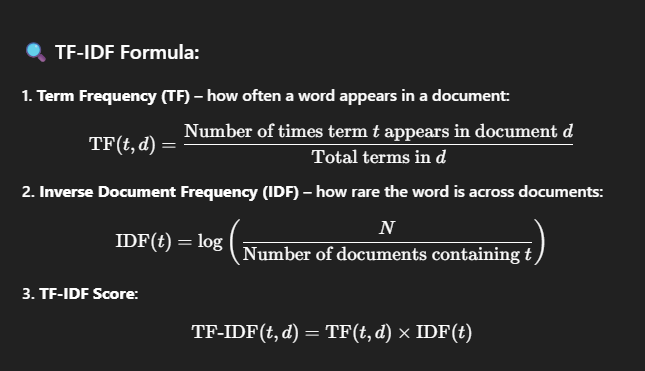

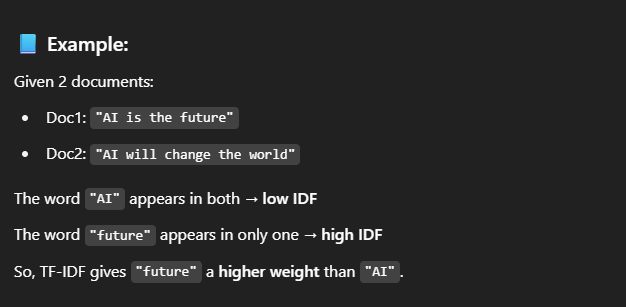

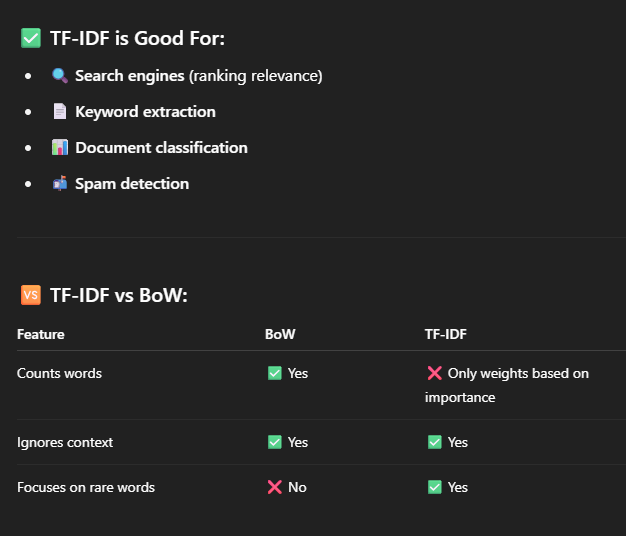

### Example:

In [ ]:


from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]


# Create the vectorizer and fit the corpus and transform them accordingly

v = TfidfVectorizer()
v.fit(corpus)

transform_output = v.transform(corpus)


# Print the vocabulary

print(v.vocabulary_)
print('\n')


# Print the idf of each word

all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    indx = v.vocabulary_.get(word)
    idf_score = v.idf_[indx]
    print(f"{word} : {idf_score}")


# Print the transformed output from tf-idf

print('\n', transform_output.toarray())


{'thor': 25, 'eating': 10, 'pizza': 22, 'loki': 17, 'is': 16, 'ironman': 15, 'ate': 7, 'already': 0, 'apple': 5, 'announcing': 4, 'new': 20, 'iphone': 14, 'tomorrow': 26, 'tesla': 24, 'model': 19, 'google': 12, 'pixel': 21, 'microsoft': 18, 'surface': 23, 'amazon': 2, 'eco': 11, 'dot': 9, 'am': 1, 'biryani': 8, 'and': 3, 'you': 27, 'are': 6, 'grapes': 13}


already : 2.386294361119891
am : 2.386294361119891
amazon : 2.386294361119891
and : 2.386294361119891
announcing : 1.2876820724517808
apple : 2.386294361119891
are : 2.386294361119891
ate : 2.386294361119891
biryani : 2.386294361119891
dot : 2.386294361119891
eating : 1.9808292530117262
eco : 2.386294361119891
google : 2.386294361119891
grapes : 2.386294361119891
iphone : 2.386294361119891
ironman : 2.386294361119891
is : 1.1335313926245225
loki : 2.386294361119891
microsoft : 2.386294361119891
model : 2.386294361119891
new : 1.2876820724517808
pixel : 2.386294361119891
pizza : 2.386294361119891
surface : 2.386294361119891
tesla : 2

## Problem Statement:

#### Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

                                                Text                   label
0  Urban Ladder Eisner Low Back Study-Office Comp...               Household
1  Contrast living Wooden Decorative Box,Painted ...               Household
2  IO Crest SY-PCI40010 PCI RAID Host Controller ...             Electronics
3  ISAKAA Baby Socks from Just Born to 8 Years- P...  Clothing & Accessories
4  Indira Designer Women's Art Mysore Silk Saree ...  Clothing & Accessories

Shape : (24000, 2)

Count : label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

                                                 Text                   label  \
0  Urban Ladder Eisner Low Back Study-Office Comp...               Household   
1  Contrast living Wooden Decorative Box,Painted ...               Household   
2  IO Crest SY-PCI40010 PCI RAID Host Controller ...             Electronics   
3  ISAKAA Baby Socks from Just 

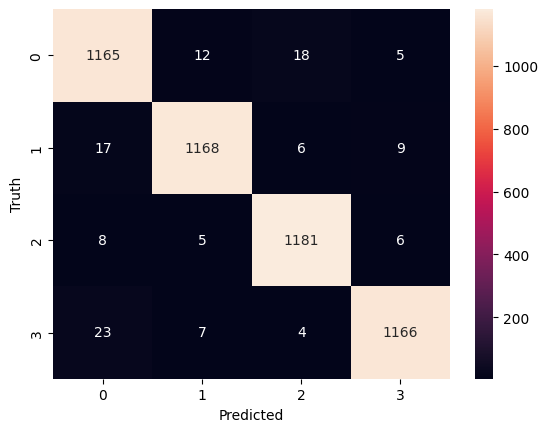

In [5]:


import pandas as pd
import spacy
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt



# Define the Dataset

df = pd.read_csv('Ecommerce_data.csv')
print(df.head())
print("\nShape :", df.shape)


# Count of each category

Count = df.label.value_counts()
print("\nCount :", Count)


# Convert text to numbers in label

df['label_num'] = df.label.map({'Household':0, 'Electronics':1, 'Clothing & Accessories':2, 'Books':3})
print("\n", df.head())


# Create a def function to Preprocess the text to remove stop words & Lemmatize

nlp = spacy.load('en_core_web_sm')

def preprocess(text):

  doc = nlp(text)
  filtered_token = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_token.append(token.lemma_)
  return " ".join(filtered_token)


# Create a new column and use the function to get the clean data

df['clean_text'] = df.Text.apply(preprocess)
print("\n", df.head())


# Split the dataset to Train & test

X_train, X_test, y_train, y_test = train_test_split(df.clean_text, df.label_num, test_size=0.2, random_state=20, stratify=df.label_num)


# Create a pipeline

clf = Pipeline([

                ("Vectorizer_bow", TfidfVectorizer()),
                ("classifier", RandomForestClassifier())
])


# Train the Model

clf.fit(X_train, y_train)


# Predict the model

y_pred = clf.predict(X_test)


# Classification report

Report = classification_report(y_test, y_pred)
print("\nReport", Report)


# Confusion matrix

Matrix = confusion_matrix(y_test, y_pred)
print("\nMatrix", Matrix)


# Plot the confusion matrix

sns.heatmap(Matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
